## kaggle :-  https://www.kaggle.com/c/incident-impact-prediction/data

#buisness problem : predict incident impact of cutomers : High, medium, low

""""Data set Details
The dataset is having incidents raised by customers.Which contains an event log of an incident management process extracted from a service desk platform of an IT company""""

#Impact: Description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

train = pd.read_csv("E:\\Project\\incident\\train.csv")
test = pd.read_csv("E:\\Project\\incident\\test.csv")

train.head(10)

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
5,9,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
6,10,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
7,11,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
8,13,INC0000047,Closed,False,1,0,8,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
9,14,INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,...,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?


In [3]:
train.isnull().sum()

Unnamed: 0            0
ID                    0
ID_status             0
active                0
count_reassign        0
count_opening         0
count_updated         0
ID_caller             0
opened_by             0
opened_time           0
Created_by            0
created_at            0
updated_by            0
updated_at            0
type_contact          0
location              0
category_ID           0
user_symptom          0
Support_group         0
support_incharge      0
Doc_knowledge         0
confirmation_check    0
impact                0
notify                0
problem_ID            0
change_request        0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
Unnamed: 0            99198 non-null int64
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null object
opened_by             99198 non-null object
opened_time           99198 non-null object
Created_by            99198 non-null object
created_at            99198 non-null object
updated_by            99198 non-null object
updated_at            99198 non-null object
type_contact          99198 non-null object
location              99198 non-null object
category_ID           99198 non-null object
user_symptom          99198 non-null object
Support_group         99198 non-null object
support_incharge      99198 non-null object
Doc_knowledge    

In [8]:
train.columns

Index(['Unnamed: 0', 'ID', 'ID_status', 'active', 'count_reassign',
       'count_opening', 'count_updated', 'ID_caller', 'opened_by',
       'opened_time', 'Created_by', 'created_at', 'updated_by', 'updated_at',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

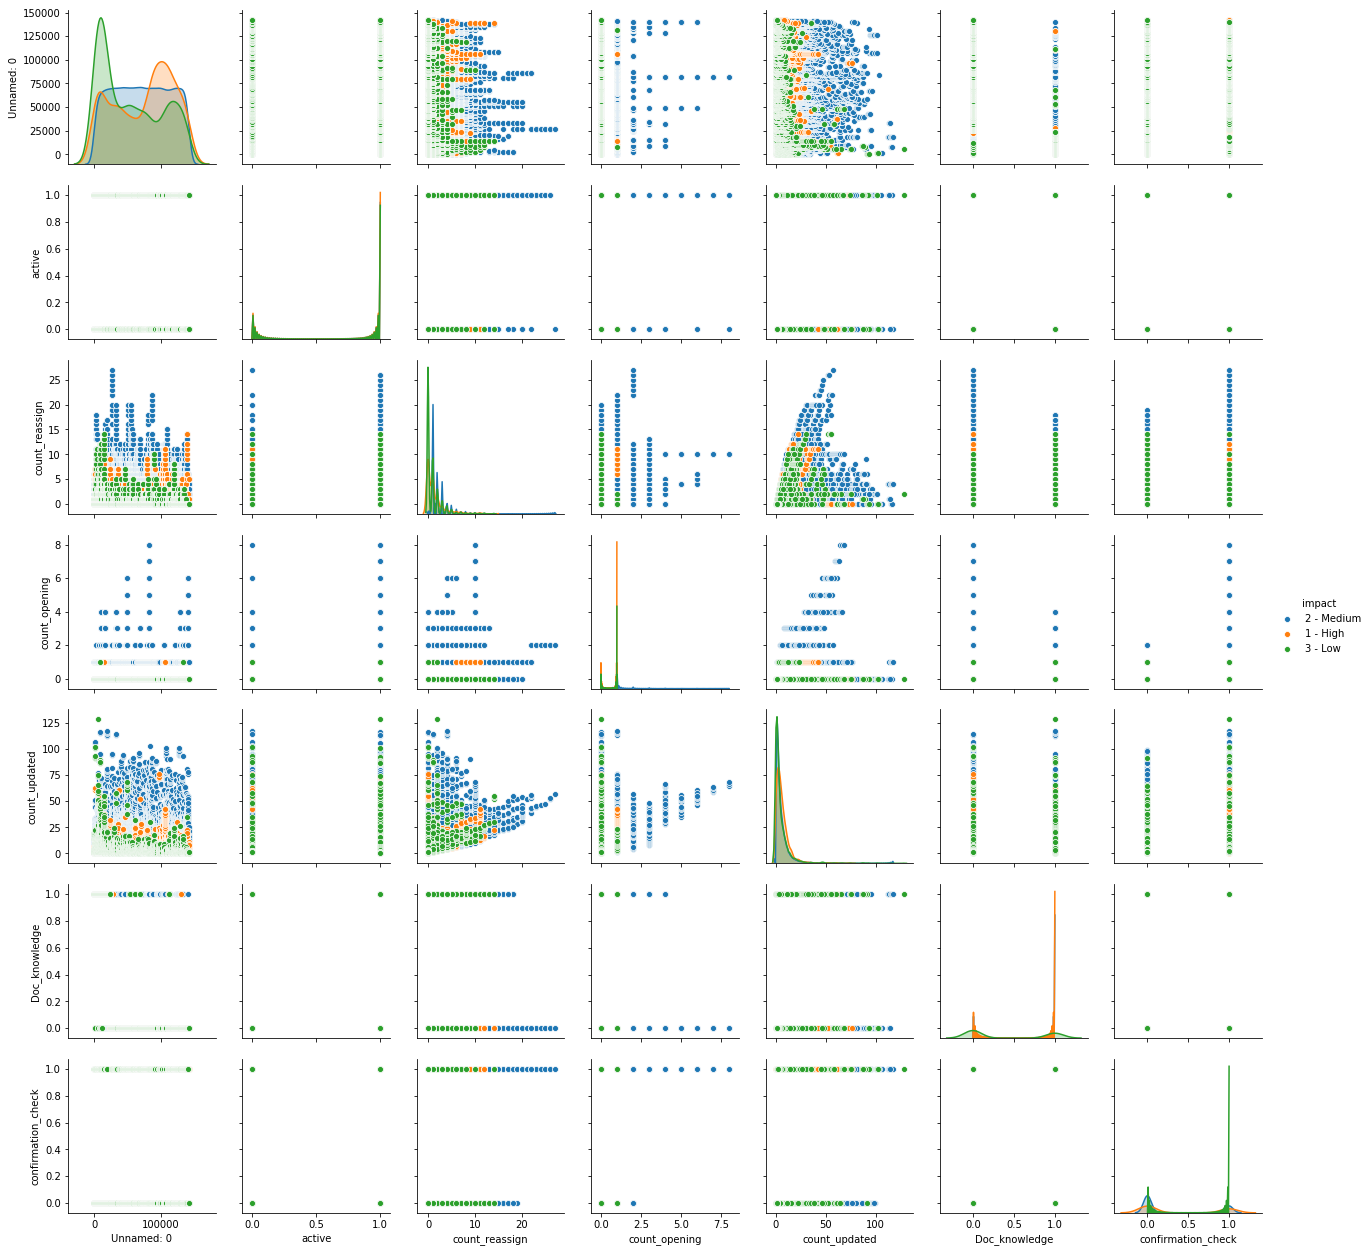

In [12]:
sns.pairplot(train, hue='impact') 

Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
-100                      2
Name: ID_status, dtype: int64

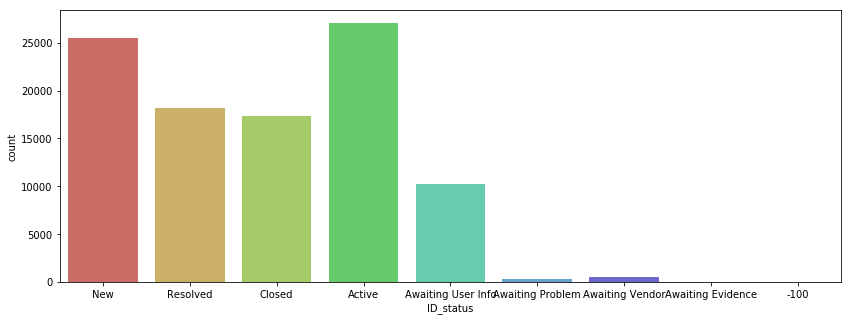

In [39]:
plt.rcParams['figure.figsize'] = [14, 5]
sns.countplot(x="ID_status", data=train, palette="hls")
train['ID_status'].value_counts()

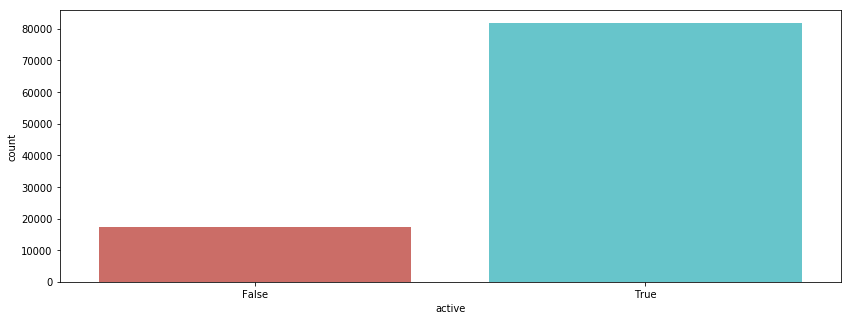

In [40]:
sns.countplot(x="active", data=train, palette="hls")

0     48853
1     26027
2     10503
3      5777
4      3244
5      1830
6      1017
7       692
8       406
9       262
10      214
11      130
12       85
13       44
14       36
15       13
20       13
17       11
18       11
16        9
19        7
22        6
26        2
23        2
21        1
24        1
25        1
27        1
Name: count_reassign, dtype: int64

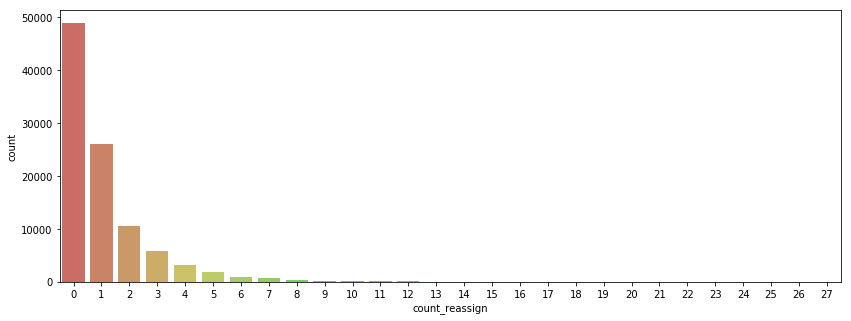

In [38]:
sns.countplot(x="count_reassign", data=train, palette="hls")
train['count_reassign'].value_counts()        #taking first 10 for model building and remaing we replace as mode

0    97571
1     1340
2      134
3       77
4       41
6       14
5       13
7        5
8        3
Name: count_opening, dtype: int64

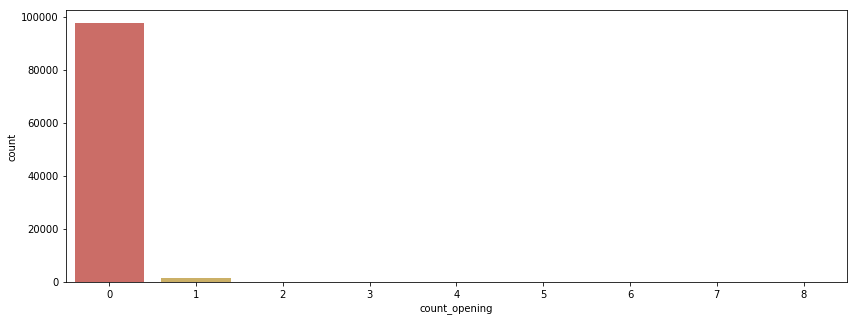

In [41]:
sns.countplot(x="count_opening", data=train, palette="hls")
train['count_opening'].value_counts()

In [46]:
train['opened_by'].value_counts()

Opened by  17     29027
Opened by  24      5658
Opened by  131     5113
Opened by  108     4234
Opened by  55      3917
Opened by  40      3468
Opened by  62      3345
?                  3328
Opened by  59      3232
Opened by  501     2957
Opened by  8       2910
Opened by  386     2695
Opened by  397     2501
Opened by  301     2282
Opened by  390     2067
Opened by  305     2000
Opened by  180     1888
Opened by  58      1689
Opened by  221     1510
Opened by  500     1356
Opened by  239     1319
Opened by  94       843
Opened by  47       748
Opened by  443      745
Opened by  463      685
Opened by  402      542
Opened by  444      454
Opened by  468      451
Opened by  20       413
Opened by  240      391
                  ...  
Opened by  435        5
Opened by  75         5
Opened by  313        4
Opened by  515        4
Opened by  230        4
Opened by  429        4
Opened by  166        4
Opened by  26         4
Opened by  406        4
Opened by  275        4
Opened by  74   

In [47]:
train['Created_by'].value_counts()

?                 37174
Created by 10     16968
Created by 13      3146
Created by 62      2790
Created by 52      2457
Created by 34      2397
Created by 20      2373
Created by 30      2337
Created by 89      2188
Created by 216     2015
Created by 6       1907
Created by 33      1872
Created by 171     1662
Created by 167     1652
Created by 81      1615
Created by 169     1492
Created by 129     1419
Created by 130     1181
Created by 98       923
Created by 31       851
Created by 217      834
Created by 107      764
Created by 25       477
Created by 188      435
Created by 192      423
Created by 108      368
Created by 45       344
Created by 172      338
Created by 193      332
Created by 199      318
                  ...  
Created by 115        5
Created by 35         5
Created by 49         5
Created by 102        4
Created by 135        4
Created by 110        4
Created by 181        4
Created by 222        4
Created by 15         4
Created by 145        4
Created by 183  

In [53]:
train['created_at'].value_counts()

?                   37174
04-07-2016 14:50       41
15-03-2016 15:19       38
19-04-2016 11:32       36
30-03-2016 08:23       33
24-05-2016 09:14       32
10-03-2016 09:39       32
04-03-2016 10:31       31
07-03-2016 13:49       30
07-03-2016 11:17       29
23-03-2016 08:57       29
07-03-2016 15:38       28
03-03-2016 16:23       28
21-03-2016 09:46       28
15-03-2016 13:59       28
07-03-2016 10:40       28
23-05-2016 14:54       28
04-03-2016 14:46       27
07-03-2016 12:02       27
07-03-2016 09:25       27
13-04-2016 11:44       27
31-03-2016 08:36       26
03-03-2016 16:47       26
03-03-2016 17:16       26
29-02-2016 09:13       26
21-03-2016 11:44       26
07-04-2016 16:07       26
28-03-2016 10:57       26
16-03-2016 09:23       26
19-05-2016 09:09       26
                    ...  
17-03-2016 15:43        1
30-05-2016 16:58        1
28-03-2016 12:49        1
23-05-2016 16:26        1
22-03-2016 11:17        1
29-02-2016 21:10        1
31-05-2016 14:53        1
12-05-2016 1

Phone             98306
Self service        714
Email               153
Direct opening       14
IVR                  11
Name: type_contact, dtype: int64

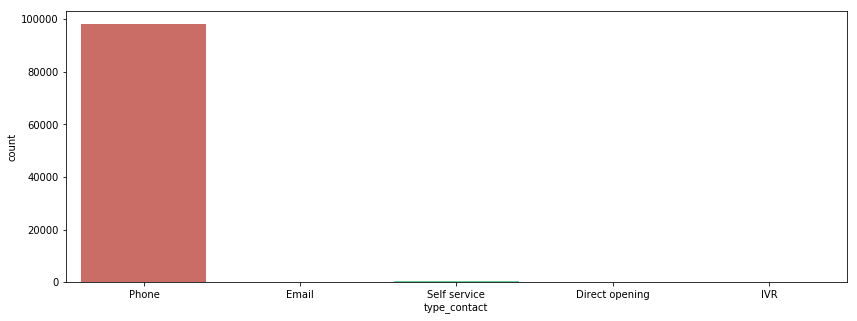

In [56]:
##Categorical attribute that shows by what means the incident was reported
sns.countplot(x="type_contact", data=train, palette="hls")  
train['type_contact'].value_counts()

In [58]:
#sns.countplot(x="location", data=train, palette="hls")  
train['user_symptom'].value_counts()

Symptom 491    36496
?              23139
Symptom 534     3852
Symptom 387     1809
Symptom 4       1794
Symptom 116     1648
Symptom 532     1460
Symptom 571     1231
Symptom 296      976
Symptom 494      956
Symptom 506      842
Symptom 10       830
Symptom 208      781
Symptom 470      763
Symptom 118      721
Symptom 120      662
Symptom 102      617
Symptom 458      580
Symptom 87       575
Symptom 54       503
Symptom 105      488
Symptom 6        478
Symptom 127      450
Symptom 117      424
Symptom 70       408
Symptom 517      403
Symptom 592      394
Symptom 295      379
Symptom 119      367
Symptom 455      312
               ...  
Symptom 150        1
Symptom 155        1
Symptom 171        1
Symptom 21         1
Symptom 558        1
Symptom 599        1
Symptom 103        1
Symptom 15         1
Symptom 299        1
Symptom 290        1
Symptom 326        1
Symptom 89         1
Symptom 34         1
Symptom 588        1
Symptom 576        1
Symptom 448        1
Symptom 407  

In [59]:
#sns.countplot(x="location", data=train, palette="hls")  
train['Support_group'].value_counts()

Group 70    30357
?            9994
Group 25     5421
Group 24     4717
Group 20     4293
Group 39     3361
Group 23     2939
Group 27     2664
Group 28     2561
Group 73     2321
Group 65     2007
Group 55     1714
Group 64     1587
Group 72     1552
Group 66     1518
Group 54     1511
Group 10     1386
Group 57     1378
Group 29     1346
Group 6      1220
Group 9      1129
Group 22     1080
Group 30      848
Group 76      830
Group 33      786
Group 31      772
Group 56      747
Group 5       698
Group 69      687
Group 37      653
            ...  
Group 61      132
Group 68      125
Group 26      125
Group 60      125
Group 35      113
Group 13      105
Group 67       87
Group 45       72
Group 81       61
Group 17       57
Group 44       56
Group 14       56
Group 77       51
Group 63       46
Group 2        35
Group 43       30
Group 82       29
Group 32       25
Group 78       17
Group 80       10
Group 36        9
Group 71        8
Group 79        5
Group 8         5
Group 18  

In [60]:
#sns.countplot(x="location", data=train, palette="hls")  
train['support_incharge'].value_counts()

?               19302
Resolver 17      7511
Resolver 13      6135
Resolver 194     2492
Resolver 57      2196
Resolver 69      2091
Resolver 33      1761
Resolver 115     1546
Resolver 24      1524
Resolver 249     1482
Resolver 215     1475
Resolver 78      1426
Resolver 140     1379
Resolver 31      1362
Resolver 236     1306
Resolver 125     1237
Resolver 183     1093
Resolver 73      1092
Resolver 198     1062
Resolver 94      1060
Resolver 34      1023
Resolver 253      907
Resolver 170      861
Resolver 126      852
Resolver 28       848
Resolver 229      800
Resolver 227      778
Resolver 149      762
Resolver 176      761
Resolver 153      744
                ...  
Resolver 5          5
Resolver 221        5
Resolver 20         5
Resolver 179        4
Resolver 166        4
Resolver 238        4
Resolver 85         4
Resolver 105        4
Resolver 222        4
Resolver 87         4
Resolver 122        4
Resolver 211        3
Resolver 63         3
Resolver 204        3
Resolver 1

False    81382
True     17816
Name: Doc_knowledge, dtype: int64

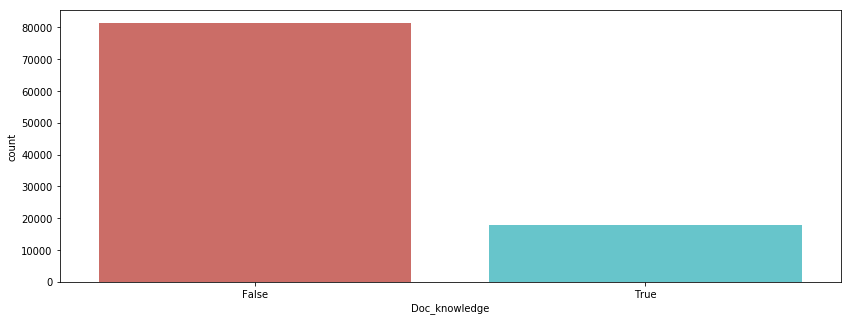

In [62]:
#Boolean attribute that shows whether a knowledge base document was used to resolve the incident
sns.countplot(x="Doc_knowledge", data=train, palette="hls")  
train['Doc_knowledge'].value_counts()

False    70526
True     28672
Name: confirmation_check, dtype: int64

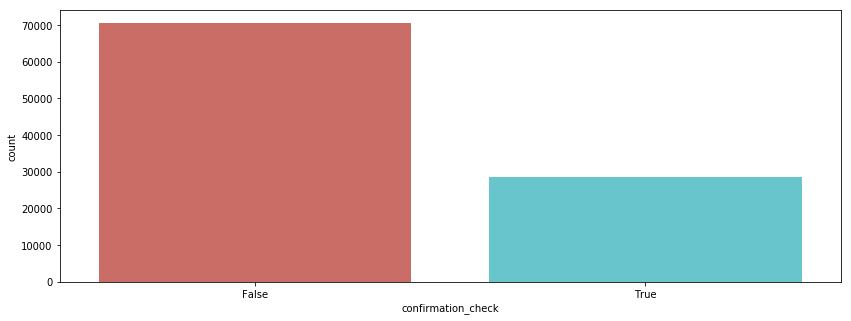

In [64]:
#Boolean attribute that shows whether the priority field has been double-checked
sns.countplot(x="confirmation_check", data=train, palette="hls")  
train['confirmation_check'].value_counts()

2 - Medium    94034
3 - Low        2720
1 - High       2444
Name: impact, dtype: int64

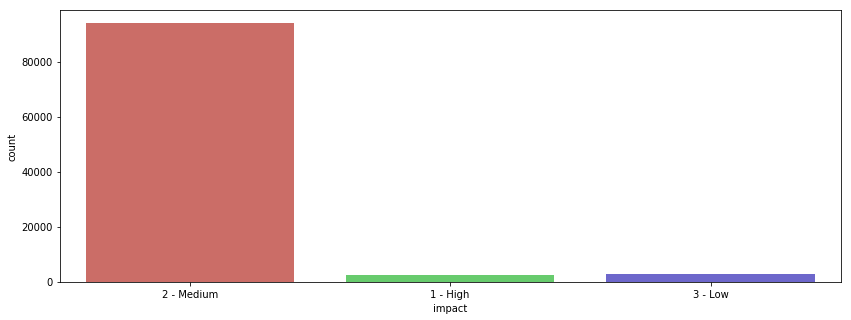

In [65]:
#Description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low)
sns.countplot(x="impact", data=train, palette="hls")  
train['impact'].value_counts()

In [68]:
#identifier of the change request associated with the incident
train['change_request'].value_counts()

?             98512
CHG0001230       15
CHG0000132       13
CHG0000047       12
CHG0000342       12
CHG0001656       10
CHG0001398       10
CHG0003516        9
CHG0001126        9
CHG0000932        9
CHG0001530        9
CHG0003167        9
CHG0001285        9
CHG0000585        8
CHG0000959        8
CHG0000232        7
CHG0000778        7
CHG0000910        7
CHG0001301        7
CHG0001943        7
CHG0000775        7
CHG0001754        7
CHG0000097        7
CHG0003447        7
CHG0000788        7
CHG0001002        7
CHG0000359        7
CHG0001019        6
CHG0001920        6
CHG0000990        6
              ...  
CHG0000623        2
CHG0000230        2
CHG0000553        2
CHG0000879        2
CHG0001864        2
CHG0000604        2
CHG0000213        2
CHG0000576        2
CHG0000646        2
CHG0000361        2
CHG0000705        2
CHG0000772        2
CHG0000752        2
CHG0000704        2
CHG0000355        2
CHG0000912        2
CHG0000332        2
CHG0000536        2
CHG0000540        1


In [30]:
train.columns

Index(['Unnamed: 0', 'ID', 'ID_status', 'active', 'count_reassign',
       'count_opening', 'count_updated', 'ID_caller', 'opened_by',
       'opened_time', 'Created_by', 'created_at', 'updated_by', 'updated_at',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')